In [1]:
%matplotlib inline

from fermi_model import * 

states10_20 = csv_to_states_from_filename('states10_20.csv')

In [1]:
def foo(text):
    return text.replace("\n", "")

In [3]:
foo("""The solution of the homogeneous system can be applied
to one-dimensional systems under spatially varying external
confinement via the local density approximation [6–10]. This
approximation typically provides a highly accurate description
for a large number of particles but not necessarily for a small
number of particles. It is thus desirable to derive more accurate
descriptions for small one-dimensional systems with two-body
δ-function interactions under external confinement. Unfortunately, extensions of the Bethe ansatz to inhomogeneous
systems are, in general, not known. This can be understood
intuitively by realizing that the relative two-body momentum
in inhomogeneous systems is not conserved due to the presence of the spatially varying confinement. Correspondingly,
harmonically trapped one-dimensional few-body systems have
been treated numerically by various techniques [7,11–17].
In this work, we apply standard Raleigh-Schrodinger ¨
perturbation theory to harmonically confined systems and
derive approximate solutions whose accuracy can be improved
systematically by considering successively higher orders in
the expansion in the small parameter. We focus on onedimensional Fermi gases with a single impurity under external harmonic confinement. This system is of particular interest
since it has been realized experimentally in Jochim’s cold-atom
laboratory [18,19]. In the experiments, the impurity is a
lithium atom that occupies a hyperfine state different from the
hyperfine state that the majority of atoms occupy. The trapping
geometry is highly elongated and effectively one-dimensional.
We show that our perturbative results enable us to calculate
the energy of the upper branch, which has been studied
experimentally, with fairly good accuracy for all N over a wide
range of coupling strengths. In addition, our results provide
bounds on the energies in the weakly and strongly interacting
regimes. These bounds can be used, e.g., to assess the accuracy
of numerical solutions.""")

'The solution of the homogeneous system can be appliedto one-dimensional systems under spatially varying externalconfinement via the local density approximation [6–10]. Thisapproximation typically provides a highly accurate descriptionfor a large number of particles but not necessarily for a smallnumber of particles. It is thus desirable to derive more accuratedescriptions for small one-dimensional systems with two-bodyδ-function interactions under external confinement. Unfortunately, extensions of the Bethe ansatz to inhomogeneoussystems are, in general, not known. This can be understoodintuitively by realizing that the relative two-body momentumin inhomogeneous systems is not conserved due to the presence of the spatially varying confinement. Correspondingly,harmonically trapped one-dimensional few-body systems havebeen treated numerically by various techniques [7,11–17].In this work, we apply standard Raleigh-Schrodinger ¨perturbation theory to harmonically confined systems andderiv

In [2]:
states_num = len(states10_20)
S_mat = np.zeros((states_num, states_num))
for i in range(states_num):
    for j in range(i+1, states_num):
        if Fermi.is_connected(states10_20[i], states10_20[j]):
            S_mat[i, j] += 1

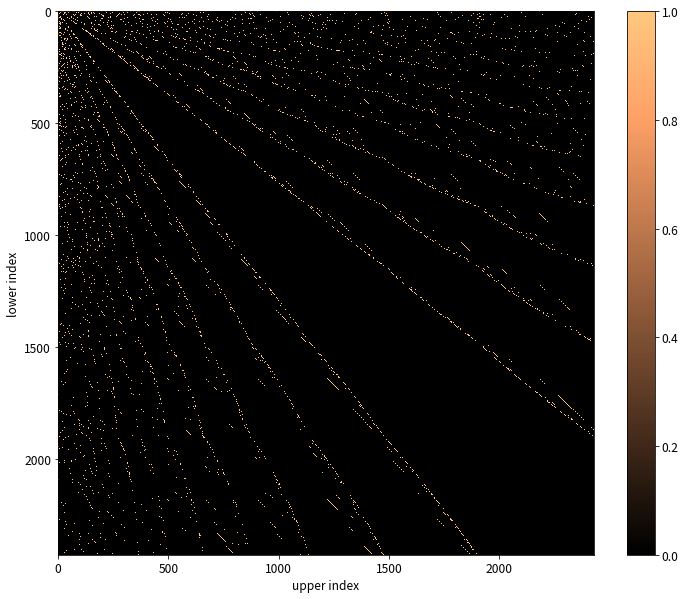

In [11]:
plt.figure(figsize=(12, 10))
plt.pcolormesh(S_mat + S_mat.T - np.eye(S_mat.shape[0]) * np.diag(S_mat), cmap="copper")
plt.ylim(S_mat.shape[0], 0)
plt.xlabel("upper index")
plt.ylabel("lower index")
# plt.title(r"$\ln {1/\rho_E(E_{upper}) }$")
plt.colorbar()
plt.show()

In [23]:
scores = Fermi.get_scores(states10_20)
scores_num = len(scores)
min_score = min(scores)
states_num = len(states10_20)
S_mean_mat = np.zeros((scores_num, scores_num))

for i in range(states_num):
    for j in range(i, states_num):
        if Fermi.is_connected(states10_20[i], states10_20[j]):
            S_mean_mat[states10_20[i].score - min_score, states10_20[j].score - min_score] += 1
 

In [27]:
def calc_degeneracies(states: list[State]):
    """実際の縮退度を計算"""
    dct = {}
    for state in states:
        if dct.get(state.score):
            dct[state.score] += 1
        else:
            dct[state.score] = 1
    degeneracies = np.fromiter(dct.values(), dtype=int)
    return degeneracies

In [39]:
dege_arr = calc_degeneracies(states10_20)
dege_mat = dege_arr.reshape(-1, 1) @ dege_arr.reshape(1, -1)

In [41]:
dege_mat

array([[     1,      1,      2,      3,      5,      7,     11,     15,
            22,     30,     42,     55,     75,     97,    128,    164,
           212,    267,    340,    423,    530],
       [     1,      1,      2,      3,      5,      7,     11,     15,
            22,     30,     42,     55,     75,     97,    128,    164,
           212,    267,    340,    423,    530],
       [     2,      2,      4,      6,     10,     14,     22,     30,
            44,     60,     84,    110,    150,    194,    256,    328,
           424,    534,    680,    846,   1060],
       [     3,      3,      6,      9,     15,     21,     33,     45,
            66,     90,    126,    165,    225,    291,    384,    492,
           636,    801,   1020,   1269,   1590],
       [     5,      5,     10,     15,     25,     35,     55,     75,
           110,    150,    210,    275,    375,    485,    640,    820,
          1060,   1335,   1700,   2115,   2650],
       [     7,      7,     14,    

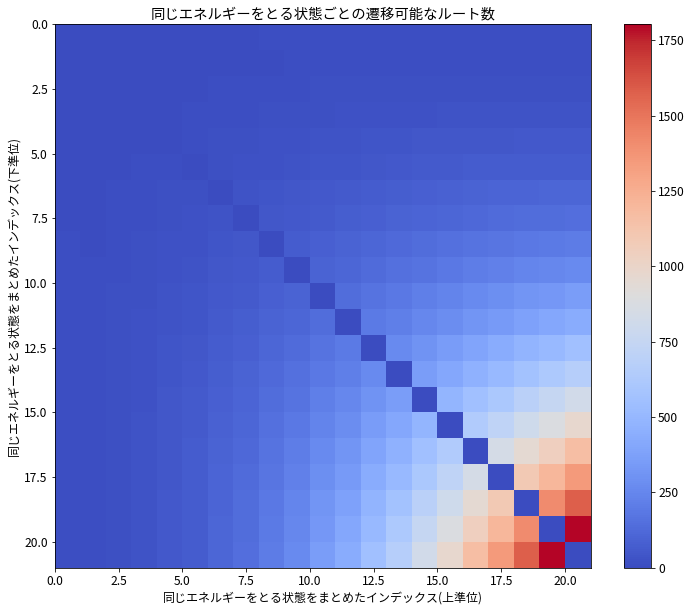

In [43]:
plt.figure(figsize=(12, 10))
plt.pcolormesh((S_mean_mat + S_mean_mat.T - np.eye(scores_num) * np.diag(S_mean_mat)), cmap="coolwarm")
plt.ylim(S_mean_mat.shape[0], 0)
plt.title("同じエネルギーをとる状態ごとの遷移可能なルート数")
plt.xlabel("同じエネルギーをとる状態をまとめたインデックス(上準位)")
plt.ylabel("同じエネルギーをとる状態をまとめたインデックス(下準位)")
# plt.title(r"$\ln {1/\rho_E(E_{upper}) }$")
plt.colorbar()
plt.show()

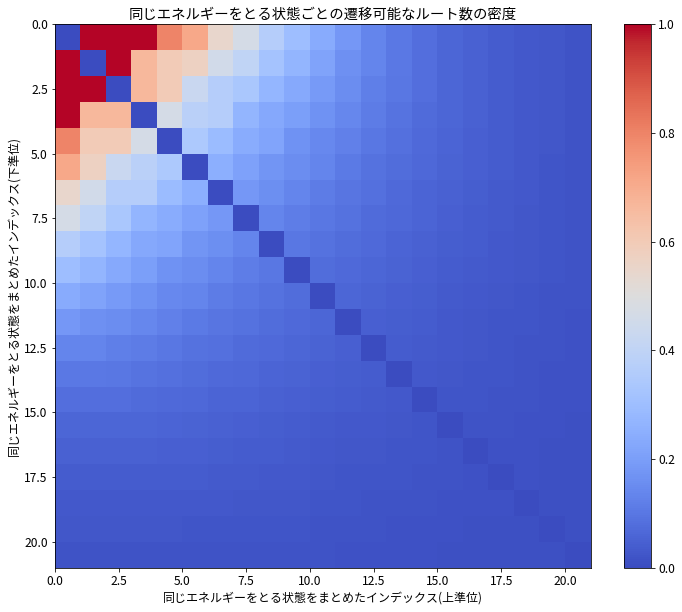

In [44]:
plt.figure(figsize=(12, 10))
plt.pcolormesh((S_mean_mat + S_mean_mat.T - np.eye(scores_num) * np.diag(S_mean_mat)) / dege_mat, cmap="coolwarm")
plt.ylim(S_mean_mat.shape[0], 0)
plt.title("同じエネルギーをとる状態ごとの遷移可能なルート数の密度")
plt.xlabel("同じエネルギーをとる状態をまとめたインデックス(上準位)")
plt.ylabel("同じエネルギーをとる状態をまとめたインデックス(下準位)")
# plt.title(r"$\ln {1/\rho_E(E_{upper}) }$")
plt.colorbar()
plt.show()